In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay



In [2]:
# Carga de datos
df = pd.read_csv(r"../data/final/final_dataset_v3.csv")
df.insert(0, 'status_inf', df.pop('status_inf'))
df = df.drop(columns=['conglome', 'vivienda','hogar','codperso','periodo','ocupinf_t1','ocupinf_t2','periodo'])
df

,status_inf,dominio,tuvotrabajo,sector_trabajador,categoria_trabajador,trabajopara,registropersonajuridica,cuentassunat,tipocontrato,numpersonastrabajo,...,combustible,celular,internet,personas_ingresos,personas_hogar,pobreza,tiempotrabajo,alquiler,horastotales_sempasada,ingtrabw
0,0,4,1,5,3,2,99.0,99.0,1.0,5.0,...,2.0,1,1,2,5,3,9.583333,400,40,13577.0
1,0,4,1,5,3,2,99.0,99.0,2.0,5.0,...,6.0,1,1,4,5,3,1.333333,150,45,18221.0
2,0,4,1,6,2,99,1.0,1.0,99.0,1.0,...,2.0,1,1,2,4,3,29.666666,500,52,36028.0
3,0,4,1,4,1,99,2.0,1.0,99.0,1.0,...,2.0,1,0,1,2,3,41.750000,0,48,26510.0
4,0,4,1,5,3,6,1.0,1.0,2.0,5.0,...,2.0,1,0,2,2,3,0.500000,100,44,12113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25164,1,3,1,6,2,99,2.0,2.0,99.0,1.0,...,2.0,1,1,4,7,3,17.000000,1000,60,24033.0
25165,0,3,1,8,4,6,1.0,1.0,1.0,5.0,...,2.0,1,1,4,6,3,30.000000,1000,48,73477.0
25166,0,3,1,3,3,2,99.0,99.0,2.0,5.0,...,2.0,1,1,4,6,3,2.000000,1000,42,42659.0
25167,0,5,1,9,4,5,1.0,1.0,2.0,3.0,...,9.0,1,0,2,6,3,0.250000,18,52,19657.0


In [3]:
print(df.info())
print("La distribución de la variable objetivo statu_inf es:")
print(df['status_inf'].value_counts())
print("La cantidad de preguntas de los datos originales (indep y objetivo) es",df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25169 entries, 0 to 25168
Data columns (total 77 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status_inf               25169 non-null  int64  
 1   dominio                  25169 non-null  int64  
 2   tuvotrabajo              25169 non-null  int64  
 3   sector_trabajador        25169 non-null  int64  
 4   categoria_trabajador     25169 non-null  int64  
 5   trabajopara              25169 non-null  int64  
 6   registropersonajuridica  25074 non-null  float64
 7   cuentassunat             25074 non-null  float64
 8   tipocontrato             25168 non-null  float64
 9   numpersonastrabajo       25165 non-null  float64
 10  tuvootrotrabajo          25169 non-null  int64  
 11  normtrabaja              25169 non-null  int64  
 12  horas_normtrabaja        25169 non-null  int64  
 13  disponiblehorastrabajar  25147 non-null  float64
 14  sexo                  

In [5]:
categoricas = ['sexo','estadocivil','tuvotrabajo','categoria_trabajador','sector_trabajador'
               ,'trabajopara','registropersonajuridica',
               'cuentassunat','tipocontrato','numpersonastrabajo','tuvootrotrabajo','normtrabaja',
               'disponiblehorastrabajar',
               'lenguamaterna','niveleduc','asiste_educ','usointernet','padece_enfer',
               'sintoma_malestar','enfermedad','recaida','accidente','notuvoenf',
               'puestosalud','centrosalud','centroopuesto','posta','hospital_minsa','hospital_seguro',
               'hospital_ffaa','consultorio','clinica','farmacia','domicilio','otro','no_busco',
               'no_dinero','lejos','demora_mucho','noconfia','nograve','remedio_caseros','no_seguro',
               'autoreceto','notiempo','maltrato','otro_motivo','essalud','seguroprivado',
               'eps','seguroffaa','sis','tipovivienda','materialparedes','materialpisos','materialtechos',
               'vivienda_status','viviendatitulo','agua_procedencia','conexionsshh','electricidad',
               'celular','internet','pobreza','dominio']
# 'antepasadosconsidera','perteneceindig','registrosunat','deseaotrotrabajo','viviadistrito','agua_potable'
df_indep = df.drop(columns = ['status_inf'])
df_categoricas = df_indep[categoricas]
df_continuas = df_indep.drop(columns=categoricas)
print("Total de variables indep")
print(df_indep.shape[1])
print("La cantidad de variables indep categoricas:")
print(df_categoricas.shape[1])
print("La cantidad de variables indep continuas:")
print(df_continuas.shape[1])


Total de variables indep
76
La cantidad de variables indep categoricas:
65
La cantidad de variables indep continuas:
11


In [6]:
# Crear dummies a partir de las variables categóricas
df_categoricas_encoded = pd.get_dummies(df_categoricas, columns=categoricas, drop_first=True, dummy_na=False)
print('La cantidad de variables indep categóricas después de haberse convertido en dummies es:')
print(df_categoricas_encoded.shape[1])

La cantidad de variables indep categóricas después de haberse convertido en dummies es:
186


In [7]:
# El dataset final de variables independientes (categoricas convertidas a dummies + continuas)
df_indep_final = pd.concat([df_categoricas_encoded, df_continuas], axis=1)
print('La cantidad de variables indep totales (categoricas convertidas a dummies + continuas) es:')
print(df_indep_final.shape[1])


La cantidad de variables indep totales (categoricas convertidas a dummies + continuas) es:
197


In [8]:
df_indep_final

,sexo_2,estadocivil_2,estadocivil_3,estadocivil_4,estadocivil_5,estadocivil_6,tuvotrabajo_2,categoria_trabajador_2,categoria_trabajador_3,categoria_trabajador_4,...,edad,habitaciones,habitacionesdormir,combustible,personas_ingresos,personas_hogar,tiempotrabajo,alquiler,horastotales_sempasada,ingtrabw
0,True,True,False,False,False,False,False,False,True,False,...,44,5.0,4.0,2.0,2,5,9.583333,400,40,13577.0
1,False,False,False,False,False,True,False,False,True,False,...,26,5.0,4.0,6.0,4,5,1.333333,150,45,18221.0
2,False,True,False,False,False,False,False,True,False,False,...,64,4.0,2.0,2.0,2,4,29.666666,500,52,36028.0
3,False,True,False,False,False,False,False,False,False,False,...,72,10.0,1.0,2.0,1,2,41.750000,0,48,26510.0
4,False,False,False,False,False,True,False,False,True,False,...,26,6.0,4.0,2.0,2,2,0.500000,100,44,12113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25164,False,True,False,False,False,False,False,True,False,False,...,61,6.0,5.0,2.0,4,7,17.000000,1000,60,24033.0
25165,False,True,False,False,False,False,False,False,False,True,...,56,7.0,6.0,2.0,4,6,30.000000,1000,48,73477.0
25166,False,False,False,False,False,True,False,False,True,False,...,29,7.0,6.0,2.0,4,6,2.000000,1000,42,42659.0
25167,False,True,False,False,False,False,False,False,False,True,...,31,3.0,1.0,9.0,2,6,0.250000,18,52,19657.0


##### Empezamos a realizar tratamiento estadístico (a partir del dataset de variables independientes (df_indep_final)):

In [9]:
# Filtrar variables con un gran número de faltantes
null_percent = df_indep_final.isnull().mean()*100
cols_null = null_percent[null_percent > 80 ].index
cols_validas = null_percent[null_percent <= 80 ].index
print(cols_null)
# df_null = df[cols_validas].copy()
# df_null.shape[1]

Index([], dtype='object')


In [10]:
# Para eliminar las variables con muy poca varianza (definido por el umbral)
varianzas = df_indep_final.var()
umbral = 0.01
vars_seleccionadas = varianzas[varianzas > umbral].index
vars_no_seleccionadas = varianzas[varianzas <= umbral].index

print("Las variables con varianza menor al umbral son:")
print(df_indep_final[vars_no_seleccionadas].nunique())
## print(df_indep_final[vars_seleccionadas].nunique())

df_indep_final=df_indep_final[vars_seleccionadas]

print("El nuevo número de variables del dataset de variables independientes es:")
print(df_indep_final.shape[1])

Las variables con varianza menor al umbral son:
categoria_trabajador_6    2
trabajopara_3             2
tipocontrato_3.0          2
tipocontrato_4.0          2
tipocontrato_5.0          2
lenguamaterna_3.0         2
lenguamaterna_5.0         2
lenguamaterna_6.0         2
lenguamaterna_7.0         2
lenguamaterna_8.0         2
centrosalud_1             2
centroopuesto_1           2
hospital_ffaa_1           2
domicilio_1               2
otro_1                    2
no_dinero_1               2
lejos_1                   2
no_seguro_1               2
maltrato_1                2
tipovivienda_5.0          2
tipovivienda_6.0          2
tipovivienda_7.0          2
materialparedes_2.0       2
materialparedes_6.0       2
materialparedes_8.0       2
materialpisos_7.0         2
materialtechos_6.0        2
materialtechos_7.0        2
materialtechos_8.0        2
vivienda_status_7         2
agua_procedencia_3        2
electricidad_3.0          2
dtype: int64
El nuevo número de variables del dataset de

In [11]:
# Cálculo de la correlación entre variables y eliminar las más altas referente a un umbral (0.70):

corr_matrix = df_indep_final.corr().abs()

# 2. Seleccionamos la parte superior de la matriz de correlación
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

print("Variables a eliminar por alta correlación (>0.70):")
print(to_drop)

df_indep_final = df_indep_final.drop(columns=to_drop)

print("Nuevo número de variables del dataset de variables independientes después de eliminas las que tienen una alta correlación:")
print(df_indep_final.shape[1])

Variables a eliminar por alta correlación (>0.70):
['trabajopara_99', 'registropersonajuridica_2.0', 'registropersonajuridica_99.0', 'cuentassunat_2.0', 'cuentassunat_99.0', 'tipocontrato_99.0', 'numpersonastrabajo_5.0', 'puestosalud_99', 'centrosalud_99', 'centroopuesto_99', 'posta_99', 'hospital_minsa_99', 'hospital_seguro_99', 'hospital_ffaa_99', 'consultorio_99', 'clinica_99', 'farmacia_99', 'domicilio_99', 'otro_99', 'no_busco_99', 'no_dinero_99', 'lejos_99', 'demora_mucho_99', 'noconfia_99', 'nograve_99', 'remedio_caseros_99', 'no_seguro_99', 'autoreceto_99', 'notiempo_99', 'maltrato_99', 'otro_motivo_99', 'essalud_2', 'eps_2', 'seguroffaa_1', 'seguroffaa_2', 'sis_2', 'viviendatitulo_99.0', 'agua_procedencia_2', 'conexionsshh_2', 'pobreza_3', 'habitacionesdormir', 'horastotales_sempasada']
Nuevo número de variables del dataset de variables independientes después de eliminas las que tienen una alta correlación:
123


### Corremos un xgboost

In [12]:
df_model_xgb = pd.concat([df[["status_inf"]], df_indep_final], axis=1)
df_model_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25169 entries, 0 to 25168
Columns: 124 entries, status_inf to ingtrabw
dtypes: bool(114), float64(4), int64(6)
memory usage: 4.7 MB


c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:00:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

     Clase 0     0.8429    0.9552    0.8956      4134
     Clase 1     0.4699    0.1822    0.2626       900

    accuracy                         0.8170      5034
   macro avg     0.6564    0.5687    0.5791      5034
weighted avg     0.7762    0.8170    0.7824      5034



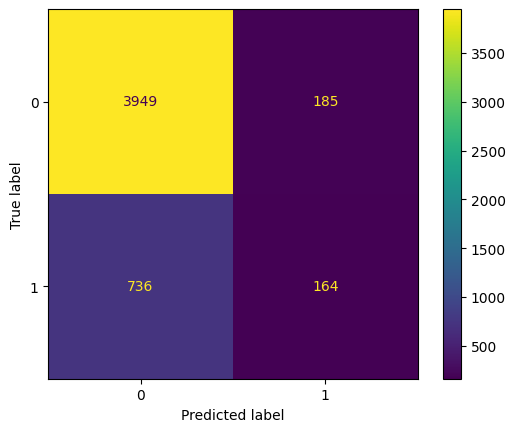

In [13]:
# XGBoost sin rebalanceo

X = df_model_xgb.drop(columns=['status_inf'])
y = df_model_xgb['status_inf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

report = classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"], digits=4)
print(report)


4.591502360455429


c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:00:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

     Clase 0     0.8781    0.7912    0.8324      4134
     Clase 1     0.3407    0.4956    0.4038       900

    accuracy                         0.7384      5034
   macro avg     0.6094    0.6434    0.6181      5034
weighted avg     0.7820    0.7384    0.7558      5034



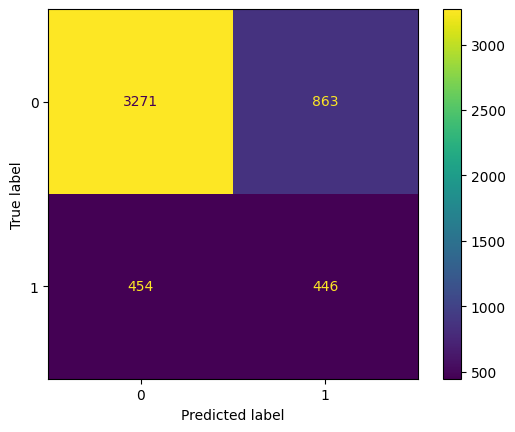

In [14]:
# XGBoost con rebalanceo

X = df_model_xgb.drop(columns=['status_inf'])
y = df_model_xgb['status_inf']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(scale_pos_weight)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                      scale_pos_weight = scale_pos_weight)
model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"], digits=4)
print(report)

                    Feature  Importance
8    categoria_trabajador_3    0.159744
18            trabajopara_2    0.025576
65                essalud_1    0.020101
120           tiempotrabajo    0.016508
20            trabajopara_6    0.014597
..                      ...         ...
92       viviendatitulo_2.0    0.004338
59               noconfia_1    0.004269
4             estadocivil_5    0.004234
63               notiempo_1    0.003959
102          conexionsshh_7    0.003896

[123 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

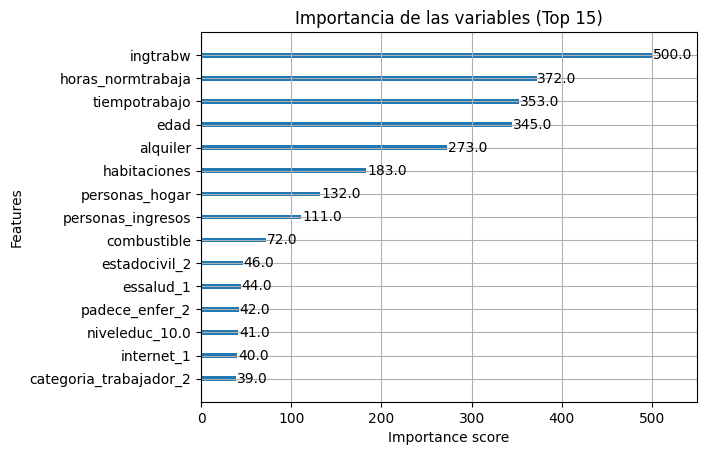

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import plot_importance

# Obtener las importancias en formato de DataFrame
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame ordenado
print(importances)

# Gráfico de importancia de características
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=15, importance_type='weight')
plt.title('Importancia de las variables (Top 15)')
plt.show()

In [16]:
print(importances)


                    Feature  Importance
8    categoria_trabajador_3    0.159744
18            trabajopara_2    0.025576
65                essalud_1    0.020101
120           tiempotrabajo    0.016508
20            trabajopara_6    0.014597
..                      ...         ...
92       viviendatitulo_2.0    0.004338
59               noconfia_1    0.004269
4             estadocivil_5    0.004234
63               notiempo_1    0.003959
102          conexionsshh_7    0.003896

[123 rows x 2 columns]


#### Corriendo ahora un Random Forest:

In [17]:
# Crear el nuevo DataFrame sin valores faltantes

df_model_rf = pd.concat([df[["status_inf"]], df_indep_final], axis=1)
df_model_rf = df_model_rf.dropna()


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      4031
           1       0.66      0.08      0.14       874

    accuracy                           0.83      4905
   macro avg       0.75      0.54      0.52      4905
weighted avg       0.80      0.83      0.77      4905



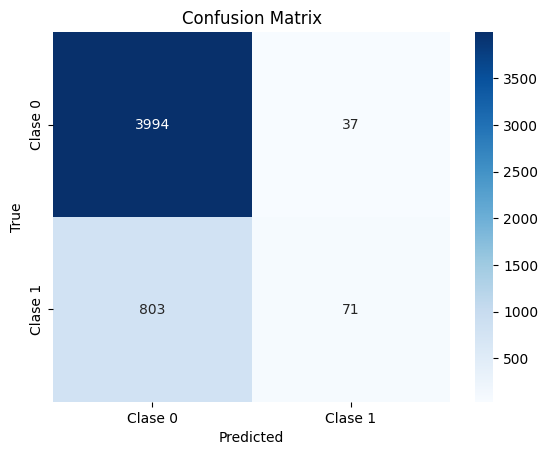

In [18]:
# Random Forest sin rebalanceo
df_model_rf_noreb=df_model_rf

# 1. Dividir el dataset en X (características) y y (variable objetivo)
X = df_model_rf_noreb.drop(columns=['status_inf'])  # Eliminar la columna objetivo
y = df_model_rf_noreb['status_inf']  # Columna objetivo

# 2. Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 4. Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 5. Imprimir el reporte de clasificación (Precision, Recall, F1-Score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 6. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      4031
           1       0.33      0.57      0.42       874

    accuracy                           0.72      4905
   macro avg       0.61      0.66      0.62      4905
weighted avg       0.79      0.72      0.74      4905



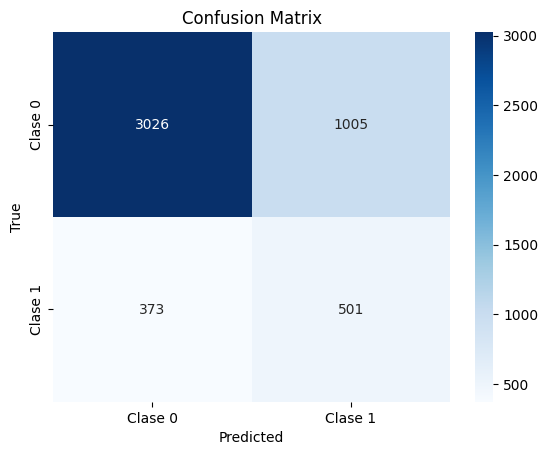

In [19]:
# Random Forest con rebalanceo

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_model_rf_reb=df_model_rf


# 1. Dividir el dataset en X (características) y y (variable objetivo)
X = df_model_rf.drop(columns=['status_inf'])  # Eliminar la columna objetivo
y = df_model_rf['status_inf']  # Columna objetivo

# 2. Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Usar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Crear y entrenar el modelo Random Forest con ajuste de pesos
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Ajuste de class_weight
rf_model.fit(X_train_resampled, y_train_resampled)

# 5. Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 6. Ajustar el umbral de decisión para mejorar recall de la clase 1
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
y_pred_adjusted = (y_proba > 0.3).astype(int)  # Ajustar el umbral de 0.5 a 0.3

# 7. Imprimir el reporte de clasificación (Precision, Recall, F1-Score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

# 8. Matriz de confusión
cm = confusion_matrix(y_test, y_pred_adjusted)
disp = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Corriendo ahora el Lasso sobre el dataset post std treatment:


In [37]:
df_lasso = pd.concat([df[["status_inf"]], df_indep_final], axis=1)
df_lasso = df_model_rf.dropna()
df_lasso_status_inf = df_lasso['status_inf']


In [38]:
X = df_lasso.drop(columns=['status_inf'])
y = df_lasso['status_inf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
coef_abs = np.abs(lasso.coef_)

weights = 1 / (coef_abs + 1e-5)  

lasso_adaptive = Lasso(alpha=1.0)
lasso_adaptive.fit(X_train * weights, y_train)

# coeficientes del Lasso Adaptativo
print(f'Coeficientes del Lasso Adaptativo: {lasso_adaptive.coef_}')

# Identificamos las variables que se mantienen (coeficientes no cercanos a cero)
selected_features = X.columns[lasso_adaptive.coef_ != 0]
print(f'Variables seleccionadas: {selected_features}')

# Filtramos el dataset eliminando las variables no seleccionadas
X_selected = X[selected_features]

Coeficientes del Lasso Adaptativo: [-1.21456840e-08 -1.87328424e-07  3.39013638e-07 -3.24669871e-07
  3.46689756e-08  8.51178501e-08  1.92048741e-07  3.74049274e-07
 -1.18267170e-06 -1.64921151e-06  7.88374878e-08  0.00000000e+00
  2.36585569e-07 -9.45083870e-09  3.53881752e-07  6.81991373e-07
  1.38439500e-06  9.48128896e-07  3.14270293e-07  9.43077217e-07
  6.71371098e-07  4.82963345e-07  2.54651972e-07  1.80862634e-06
  1.10016567e-09 -8.06275223e-08 -6.47997342e-08 -1.09381255e-07
 -5.00147403e-07 -8.90582709e-08  1.55288034e-07 -5.34426407e-07
 -2.02796376e-07 -5.46796973e-09 -1.46652672e-07 -9.45359614e-08
  3.41964286e-09  1.52270916e-07 -6.24234635e-08  2.40425630e-08
  1.73471781e-07 -2.53962388e-08 -9.21600822e-08 -5.06503684e-07
 -3.18558106e-07 -2.57936901e-07 -7.13907811e-07 -8.04069731e-07
 -1.04052836e-06 -5.25921397e-07 -1.00619254e-06 -1.20653094e-06
 -2.89055539e-09  2.08746694e-07  2.00535026e-07  9.26382026e-08
  1.79443566e-07  1.53057826e-07  1.79614854e-07  3.149

In [39]:
X_selected.shape[1]

129

In [40]:
# Logit 
df_lasso_final = pd.concat([X_selected, df_lasso_status_inf], axis=1)

from sklearn.linear_model import LogisticRegression

X = df_lasso_final.drop(columns=['status_inf'])  # Eliminamos la columna dependiente
y = df_lasso_final['status_inf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logit_model = LogisticRegression(solver='liblinear')  # 'liblinear' es adecuado para pequeños datasets
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3257
           1       0.00      0.00      0.00       660

    accuracy                           0.83      3917
   macro avg       0.42      0.50      0.45      3917
weighted avg       0.69      0.83      0.76      3917



c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi